#### Code to plot Figures 2A,B and S13A-F in Mahdavi &Siegel (2020) AS&T
The second series of figures (S13A-F) is in the paper's Supplementary Information (SI).

These figures illustrate the size distribution of test dust samples (ISO or ASHRAE) along with that of the recovered dust from the extraction of filters. The comparison illustrates underrepresented recovered samples particulalry for sizes < 10 µm.

Plot type: Line plot.

In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel(r'artl_v_psd_master.xlsx')
master_list = list(df.columns)

df_td_col_list = [col for col in list(df.columns) if ('_td_' in col) & (('mean' in col) | ('max' in col)  | ('min' in col))]
df_td = df[['Size'] + df_td_col_list]

filter_type = {'08m': 'MERV 8',
               '08e': 'MERV 8E',
               '11e': 'MERV 11',
               '14e': 'MERV 14'}


df_iso_min = df['Eval_010_iso2_11e_td_180326_am_mean'] - df['Eval_010_iso2_11e_td_180326_am_min']
df_iso_max = df['Eval_010_iso2_11e_td_180326_am_max'] - df['Eval_010_iso2_11e_td_180326_am_mean']

df_ash_min = df['Eval_001_ash2_11e_td_171128_am_mean'] - df['Eval_001_ash2_11e_td_171128_am_min']
df_ash_max = df['Eval_001_ash2_11e_td_171128_am_max'] - df['Eval_001_ash2_11e_td_171128_am_mean']


In [10]:
df.iloc[13:,].head() # showing some data from where the size distribution starts to rise (index 13 to the end)

,Size,Eval_021_ash2_08m_fg_180406_am_count,Eval_021_ash2_08m_hd_180406_am_count,Eval_021_ash2_08m_sc_180406_am_count,Eval_021_ash2_08m_sd_180406_am_count,Eval_021_ash2_08m_fg_180406_am_mean,Eval_021_ash2_08m_hd_180406_am_mean,Eval_021_ash2_08m_sc_180406_am_mean,Eval_021_ash2_08m_sd_180406_am_mean,Eval_021_ash2_08m_fg_180406_am_median,...,Eval_001_ash2_11e_hd_171128_am_mean,Eval_001_ash2_11e_td_171128_am_mean,Eval_001_ash2_11e_hd_171128_am_median,Eval_001_ash2_11e_td_171128_am_median,Eval_001_ash2_11e_hd_171128_am_min,Eval_001_ash2_11e_td_171128_am_min,Eval_001_ash2_11e_hd_171128_am_max,Eval_001_ash2_11e_td_171128_am_max,Eval_001_ash2_11e_hd_171128_am_std,Eval_001_ash2_11e_td_171128_am_std
13,0.447,5,5,5,5,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
14,0.501,5,5,5,5,0.050,0.008,0.048,0.034,0.05,...,0.060,0.060,0.06,0.06,0.06,0.06,0.06,0.06,0.000000,0.000000
15,0.562,5,5,5,5,0.168,0.114,0.172,0.174,0.17,...,0.228,0.218,0.23,0.22,0.22,0.21,0.23,0.22,0.004472,0.004472
16,0.631,5,5,5,5,0.334,0.298,0.366,0.392,0.33,...,0.470,0.454,0.47,0.46,0.46,0.44,0.48,0.46,0.007071,0.008944
17,0.708,5,5,5,5,0.504,0.484,0.574,0.634,0.50,...,0.726,0.702,0.73,0.71,0.71,0.68,0.74,0.71,0.011402,0.013038


With 4 filter types and 2 test dust sample types, there will be 8 (four times two) figures. Given three statstical properties (mean, min, and max). This will cause two for loops inside each other, as coded below:

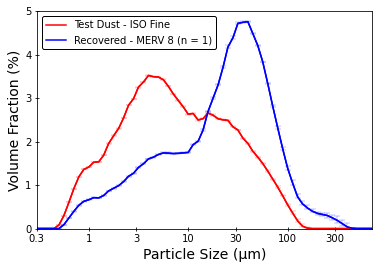

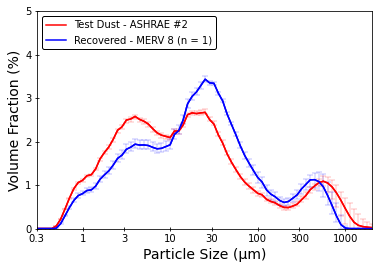

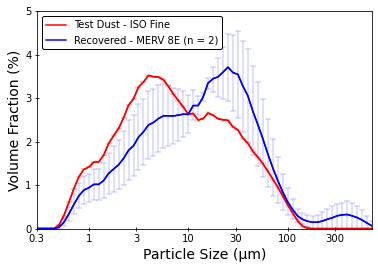

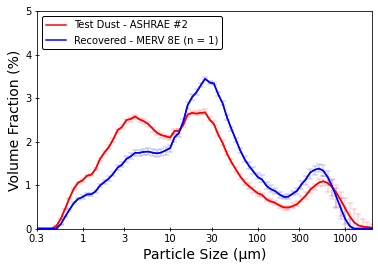

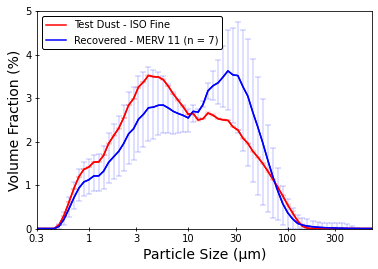

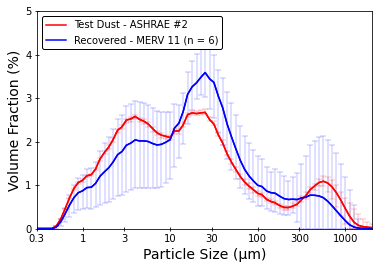

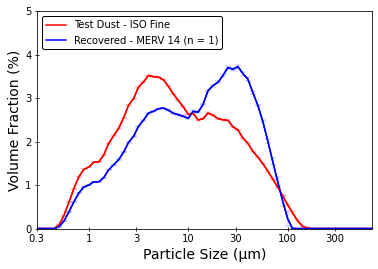

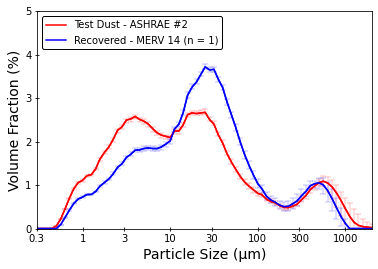

In [11]:
for f in ['08m','08e','11e','14e']:
    for t in ['iso','ash']:
        for stat in ['min', 'max', 'mean']:
            locals()['psd_%s' %stat] = [col for col in list(df.columns) if (f in col) & (t in col) & (stat in col) & ('_hd_' in col) & ('_td_' not in col) & ('_r2' not in col) & ('iso1' not in col)]
        
        counter = len(psd_min)
        
        if counter == 1:
            df_mean = df[psd_mean[0]]
            df_min = df_mean - df[psd_min[0]]
            df_max = df[psd_max[0]] - df_mean
        else:
            df_min = df[psd_min].min(axis=1)
            df_mean = df[psd_mean].mean(axis=1)
            df_max = df[psd_max].max(axis=1)
            
            df_min = df_mean - df_min
            df_max = df_max - df_mean
        
        
        plt.figure()
        if t == 'iso':
            x_up_lim = 700 # defining the upper limit of x axis for ISO samples
            a = [0.3, 1, 3, 10, 30, 100, 300]
            plt.plot(df['Size'], df['Eval_010_iso2_11e_td_180326_am_mean'], c = "red", label = 'Test Dust - ISO Fine')
            plt.errorbar(df['Size'], df['Eval_010_iso2_11e_td_180326_am_mean'], yerr = [df_iso_min,df_iso_max], 
                         xerr = None, capsize = 3, c = "red", ecolor = 'red', elinewidth = 0.25, capthick = 0.25)
                        
        elif t == 'ash':
            x_up_lim = 2000 # defining the upper limit of x axis for ASHRAE samples
            a = [0.3, 1, 3, 10, 30, 100, 300, 1000]
            plt.plot(df['Size'], df['Eval_001_ash2_11e_td_171128_am_mean'], c = "red", label = 'Test Dust - ASHRAE #2')
            plt.errorbar(df['Size'], df['Eval_001_ash2_11e_td_171128_am_mean'], yerr = [df_ash_min,df_ash_max], 
                         xerr = None, capsize = 3, c = "red", ecolor = 'red', elinewidth = 0.25, capthick = 0.25)
    
        plt.plot(df['Size'], df_mean, c = "blue", label = 'Recovered - ' + filter_type[f] + ' (n = ' + str(counter) + ')')
        plt.errorbar(df['Size'], df_mean, yerr = [df_min,df_max], xerr = None, capsize = 3, c= 'blue', ecolor = 'blue', elinewidth = 0.25, capthick = 0.25)
        plt.xscale('log')
             
        plt.xlim(0.3, x_up_lim)
        plt.xticks(ticks = a, labels = a)
        plt.minorticks_off()
        plt.xlabel('Particle Size (µm)', size = 14)

        plt.ylim(0, 5)
        plt.yticks(np.arange(0, 6, step=1))
        plt.ylabel('Volume Fraction (%)', size = 14)
        plt.tick_params(axis = 'both', direction = 'inout')
        
        plt.legend(loc = 2, frameon = True, edgecolor = 'black', framealpha=1)
        
        plt.savefig(r'Figure2_%s_%s.jpg' %(f,t), format='jpg', dpi=1600, bbox_inches='tight')


End of  Code